In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


In [2]:
# Load datasets
train_df = pd.read_csv("kdd_train.csv")
test_df = pd.read_csv("kdd_test.csv")

In [3]:
# Define attack categories
attack_map = {
    'normal': 'normal',
    'neptune': 'DoS', 'smurf': 'DoS', 'back': 'DoS', 'teardrop': 'DoS',
    'pod': 'DoS', 'land': 'DoS', 'mailbomb': 'DoS', 'apache2': 'DoS',
    'udpstorm': 'DoS', 'processtable': 'DoS',
    
    'satan': 'Probe', 'ipsweep': 'Probe', 'nmap': 'Probe', 'portsweep': 'Probe',
    'mscan': 'Probe', 'saint': 'Probe',
    
    'guess_passwd': 'R2L', 'ftp_write': 'R2L', 'imap': 'R2L', 'phf': 'R2L',
    'multihop': 'R2L', 'warezmaster': 'R2L', 'warezclient': 'R2L', 'spy': 'R2L',
    'xlock': 'R2L', 'xsnoop': 'R2L', 'snmpguess': 'R2L', 'snmpgetattack': 'R2L',
    'httptunnel': 'R2L', 'sendmail': 'R2L', 'named': 'R2L',
    
    'buffer_overflow': 'U2R', 'loadmodule': 'U2R', 'perl': 'U2R', 'rootkit': 'U2R',
    'sqlattack': 'U2R', 'xterm': 'U2R', 'ps': 'U2R'
}

In [4]:
#inspecting column names
print(train_df.columns)
print(test_df.columns)


Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'labels'],
      dtype='object')
Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_faile

In [5]:
# Label attack category
train_df['attack_category'] = train_df['labels'].map(attack_map)
test_df['attack_category'] = test_df['labels'].map(attack_map)


In [6]:
# Drop rows with NaN attack mapping
train_df = train_df.dropna(subset=['attack_category'])
test_df = test_df.dropna(subset=['attack_category'])

In [7]:
# Encode categorical columns
cat_cols = ['protocol_type', 'service', 'flag']
for col in cat_cols:
    enc = LabelEncoder()
    train_df[col] = enc.fit_transform(train_df[col])
    test_df[col] = enc.transform(test_df[col])

In [8]:
# Drop label columns
X_train = train_df.drop(columns=['labels', 'attack_category'])
X_test = test_df.drop(columns=['labels', 'attack_category'])

In [9]:
# Target for supervised models
y_train = train_df['attack_category']
y_test = test_df['attack_category']

# Normalize
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
#supervised model

In [11]:
#SMOTE (Synthetic Minority Oversampling Technique)
#Creates synthetic samples for minority classes.
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)


In [12]:
#Class Weighting
#Tell the model to give more importance to rare classes.
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)


Classification Report:
               precision    recall  f1-score   support

         DoS       0.99      0.95      0.97      8095
       Probe       0.96      0.87      0.91      2157
         R2L       1.00      0.12      0.22      1009
         U2R       1.00      0.32      0.48        38
      normal       0.88      0.99      0.93     11245

    accuracy                           0.92     22544
   macro avg       0.97      0.65      0.70     22544
weighted avg       0.93      0.92      0.91     22544



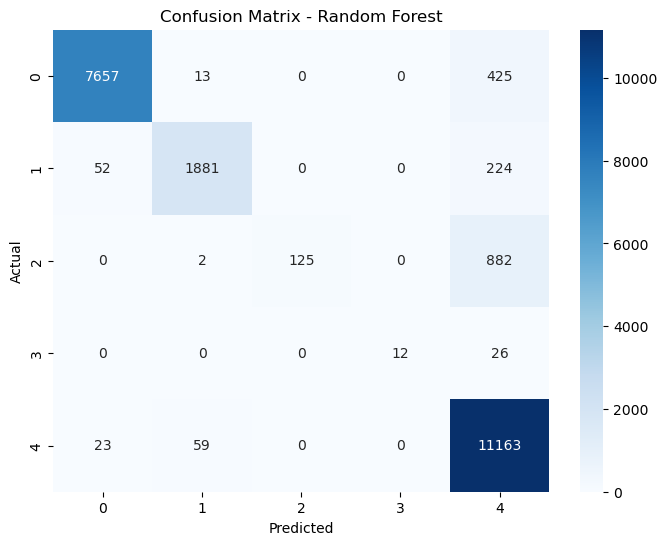

In [13]:
#Class Weighting
#Tell the model to give more importance to rare classes.
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)


In [14]:
#Logistic Regression

📊 Classification Report - Logistic Regression:
              precision    recall  f1-score   support

         DoS       0.98      0.92      0.95      8095
       Probe       0.75      0.92      0.83      2157
         R2L       0.50      0.35      0.41      1009
         U2R       0.07      0.66      0.13        38
      normal       0.90      0.90      0.90     11245

    accuracy                           0.88     22544
   macro avg       0.64      0.75      0.64     22544
weighted avg       0.89      0.88      0.88     22544



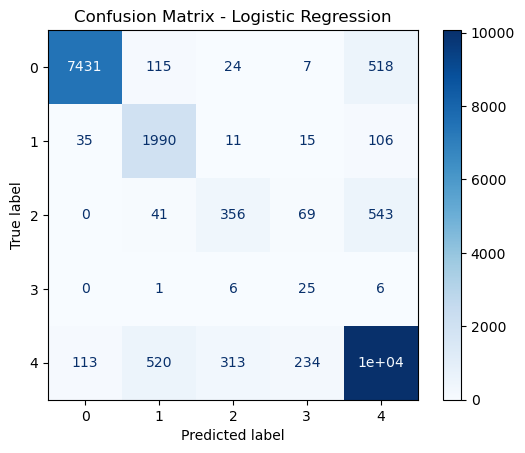

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Initialize the model
lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Train the model
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)

# Print classification report
print("📊 Classification Report - Logistic Regression:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
##sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') 
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()



In [16]:
#Unsupervised Learning

In [17]:
#Isolation Forest 

In [30]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Load data
train_df = pd.read_csv("kdd_train.csv")
test_df = pd.read_csv("kdd_test.csv")


In [32]:
# Combine for consistent encoding
combined_df = pd.concat([train_df, test_df], axis=0)

In [33]:
# Encode categorical columns
for col in combined_df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    combined_df[col] = le.fit_transform(combined_df[col])

In [34]:
# Split back to train and test
train_df_encoded = combined_df.iloc[:len(train_df)]
test_df_encoded = combined_df.iloc[len(train_df):]

In [35]:
# Select features (drop label column if present)
X_train = train_df_encoded.drop(columns=['label'], errors='ignore')
X_test = test_df_encoded.drop(columns=['label'], errors='ignore')


In [36]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [37]:
# Initialize Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(X_train_scaled)

IsolationForest(contamination=0.1, random_state=42)

In [38]:
# Predict (-1 = anomaly, 1 = normal)
y_pred = iso_forest.predict(X_test_scaled)
y_pred = [1 if p == -1 else 0 for p in y_pred]  # Convert: 1 = anomaly, 0 = normal


In [40]:
# Get true labels
y_true = test_df['labels'].apply(lambda x: 1 if x != 'normal' else 0)


In [41]:
# Evaluation
print("🔍 Classification Report:")
print(classification_report(y_true, y_pred))

🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.96      0.70     11245
           1       0.83      0.21      0.34     11299

    accuracy                           0.58     22544
   macro avg       0.69      0.58      0.52     22544
weighted avg       0.69      0.58      0.52     22544



📊 Confusion Matrix:


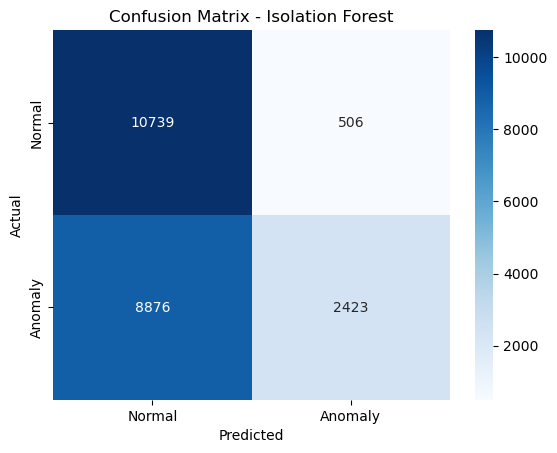

In [42]:
print("📊 Confusion Matrix:")
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal','Anomaly'], yticklabels=['Normal','Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Isolation Forest')
plt.show()

In [ ]:
#Permutation Importance

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import numpy as np

In [44]:
# Step 1: Predict with Isolation Forest
y_pseudo_labels = iso_forest.predict(X_train_scaled)
y_pseudo_labels = np.where(y_pseudo_labels == -1, 1, 0)  # 1 = anomaly, 0 = normal

In [45]:
# Step 2: Train Random Forest on pseudo-labels
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_pseudo_labels)

RandomForestClassifier(random_state=42)

In [46]:
# Step 3: Permutation Importance
results = permutation_importance(rf, X_train_scaled, y_pseudo_labels, n_repeats=10, random_state=42)


In [48]:
# Step 4: Visualize
feature_names = X_train.columns
importances = pd.Series(results.importances_mean, index=feature_names)
importances_sorted = importances.sort_values(ascending=False)


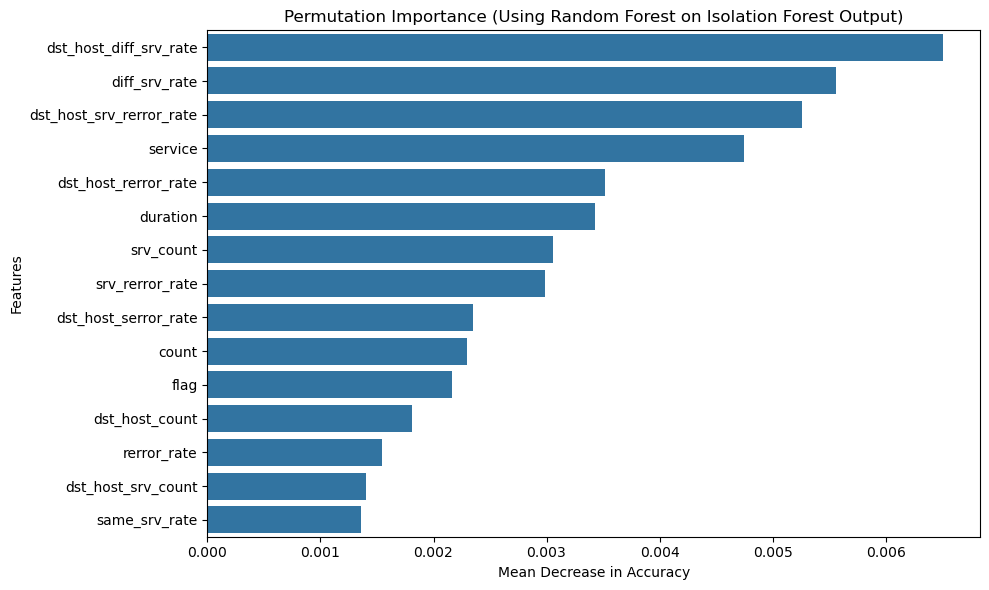

In [49]:
# Plot top features
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=importances_sorted[:15], y=importances_sorted.index[:15])
plt.title("Permutation Importance (Using Random Forest on Isolation Forest Output)")
plt.xlabel("Mean Decrease in Accuracy")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [18]:
#Autoencoder

In [19]:
!pip install tensorflow

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Model

In [22]:
##
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Load data
train_df = pd.read_csv("kdd_train.csv")
test_df = pd.read_csv("kdd_test.csv")

# Drop label column and save it
train_labels = train_df["labels"].copy()
test_labels = test_df["labels"].copy()

# Drop label column for feature matrix
X_train = train_df.drop(columns=["labels"])
X_test = test_df.drop(columns=["labels"])

# Encode categorical features
label_encoders = {}
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])
        X_test[col] = le.transform(X_test[col])
        label_encoders[col] = le

# Normalize features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define autoencoder architecture
input_dim = X_train_scaled.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(32, activation='relu')(input_layer)
encoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)
autoencoder = Model(inputs=input_layer, outputs=decoded)

autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=20, batch_size=256, shuffle=True, validation_split=0.1)

# Predict reconstruction error
reconstructions = autoencoder.predict(X_test_scaled)
mse = np.mean(np.power(X_test_scaled - reconstructions, 2), axis=1)

# Set threshold (can be mean + 2*std of training loss or based on test)
threshold = np.percentile(mse, 95)
y_pred = [1 if err > threshold else 0 for err in mse]
y_true = [0 if lbl == 'normal' else 1 for lbl in test_labels]

# Evaluation
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))


Epoch 1/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - loss: 0.0970 - val_loss: 0.0073
Epoch 2/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - loss: 0.0061 - val_loss: 0.0039
Epoch 3/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - loss: 0.0035 - val_loss: 0.0028
Epoch 4/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - loss: 0.0026 - val_loss: 0.0023
Epoch 5/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - loss: 0.0022 - val_loss: 0.0020
Epoch 6/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - loss: 0.0020 - val_loss: 0.0018
Epoch 7/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - loss: 0.0017 - val_loss: 0.0016
Epoch 8/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 9/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - loss: 0.0013 - val_loss: 0.0013
Epoch 10/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - loss: 0.0012 - val_loss: 0.0012
Epoch 11/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - loss: 0.0011 - val_loss: 0.0012
Epoch 12/20
443/443 ━━━━━━━━━━

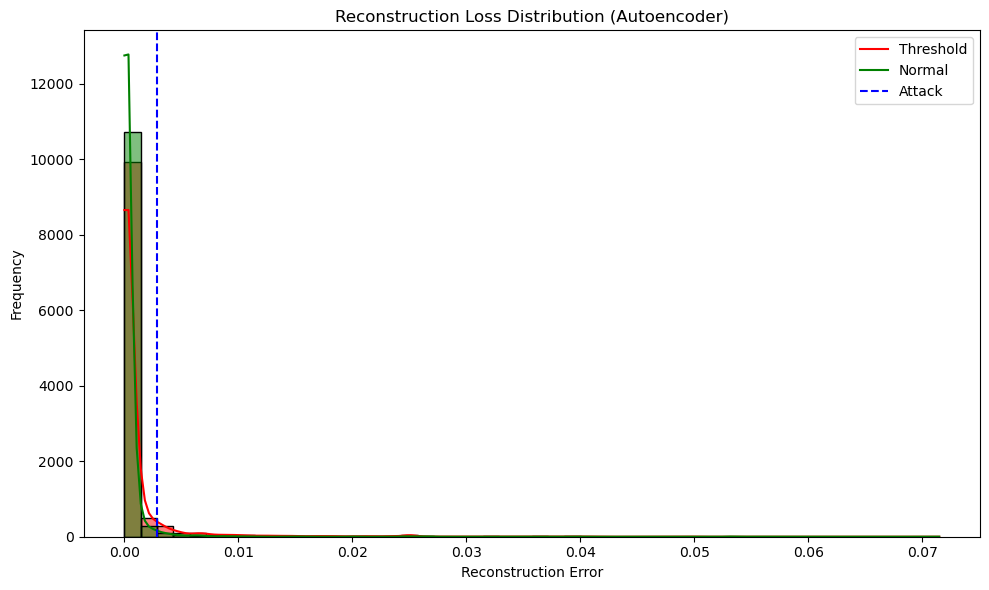

In [24]:
##Visualize Reconstruction Loss Distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Create DataFrame of losses and true labels
loss_df = pd.DataFrame()
loss_df["Reconstruction_error"] = mse
loss_df["True_label"] = y_true

# Plot
plt.figure(figsize=(10,6))
sns.histplot(data=loss_df, x="Reconstruction_error", hue="True_label", bins=50, kde=True, palette={0:'green', 1:'red'})
plt.axvline(threshold, color='blue', linestyle='--', label=f'Threshold: {threshold:.4f}')
plt.title("Reconstruction Loss Distribution (Autoencoder)")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend(["Threshold", "Normal", "Attack"])
plt.tight_layout()
plt.show()


In [26]:
pip install shap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.6/547.6 kB 6.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [28]:
!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.4 MB/s eta 0:00:00


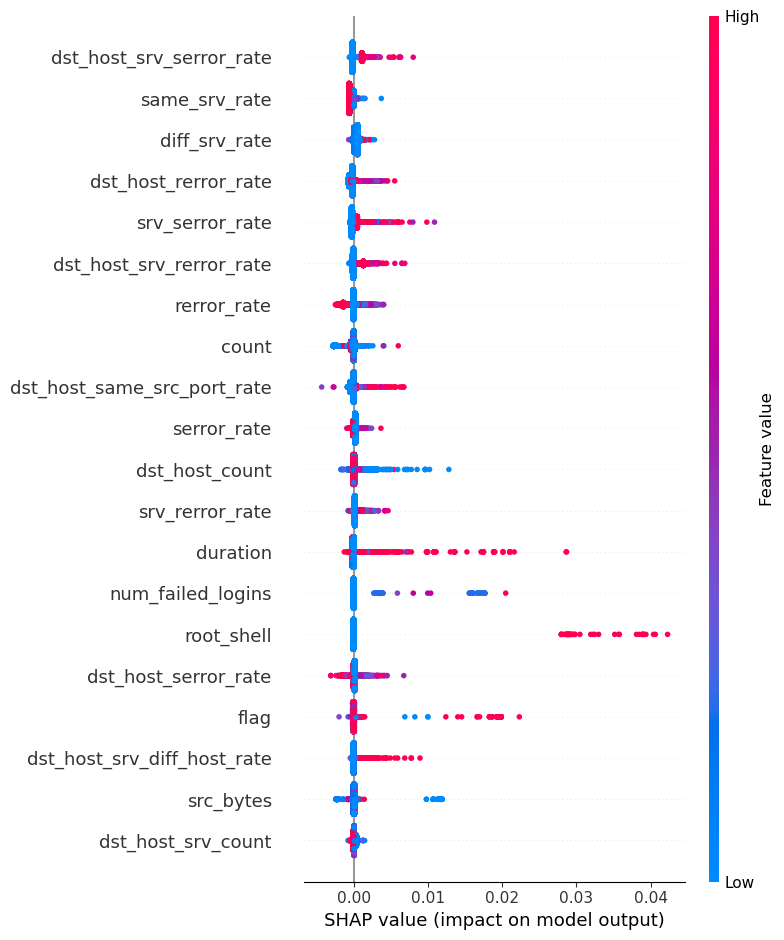

In [29]:
#SHAP Interpretability for Autoencoder
import shap
import xgboost as xgb

# Train a simple model on reconstruction error to approximate anomaly scoring
recon_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
recon_df["mse"] = mse

# Train regressor to predict mse
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_test_scaled, mse)

# SHAP explainer
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test_scaled)

# SHAP summary plot
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_test.columns)


In [51]:
#SHAP Visualization using Isolation Forest Labels
import shap
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt

In [52]:
# 1. Generate pseudo-labels using Isolation Forest (-1 = anomaly, 1 = normal)
pseudo_labels = iso_forest.predict(X_train_scaled)
pseudo_labels = np.where(pseudo_labels == -1, 1, 0)  # 1 = anomaly, 0 = normal

In [53]:
# 2. Train XGBoostClassifier on pseudo-labeled data
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train_scaled, pseudo_labels)



/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:38:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

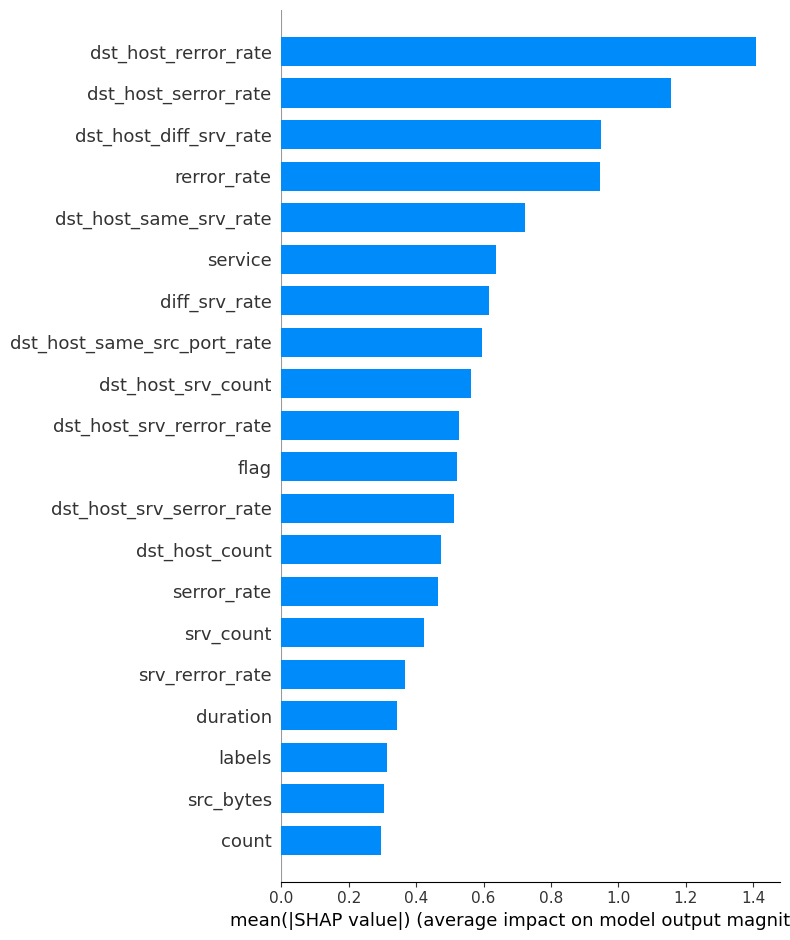

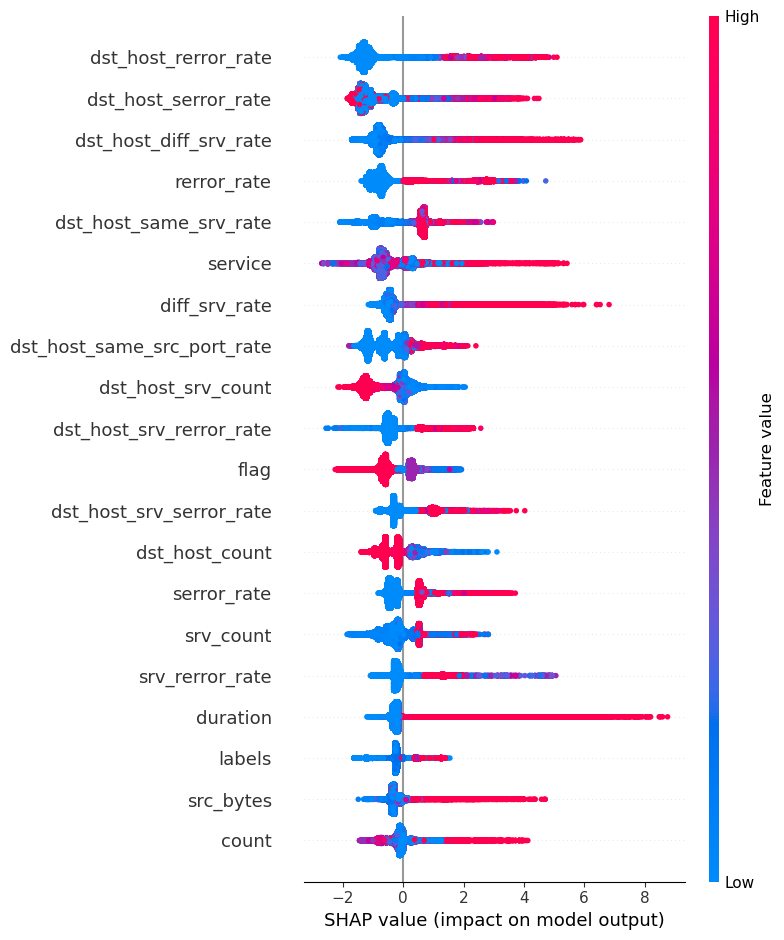

In [54]:

# 3. SHAP Explainer
explainer = shap.TreeExplainer(xgb_clf)
shap_values = explainer.shap_values(X_train_scaled)

# 4. SHAP Summary Plot
shap.summary_plot(shap_values, features=X_train_scaled, feature_names=X_train.columns, plot_type="bar")

# Optional: detailed beeswarm plot
shap.summary_plot(shap_values, features=X_train_scaled, feature_names=X_train.columns)

In [ ]:
#Hybrid Model Implementation Steps Autoencoder + isolation forest

In [ ]:
#Get Bottleneck Features from Autoencoder

In [50]:
# Define encoder model from your trained autoencoder
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer(index=3).output)

# Encode both train and test sets
X_train_encoded = encoder.predict(X_train_scaled)
X_test_encoded = encoder.predict(X_test_scaled)


ValueError: Input 0 of layer "functional_1" is incompatible with the layer: expected shape=(None, 41), found shape=(32, 42)

In [56]:
#Train Isolation Forest on Encoded Data
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
iso_forest.fit(X_train_encoded)

# Predict anomalies (1 = normal, -1 = anomaly)
y_pred_hybrid = iso_forest.predict(X_test_encoded)

# Convert to 0 = normal, 1 = anomaly
y_pred_hybrid = [1 if x == -1 else 0 for x in y_pred_hybrid]


In [58]:
print(test_df.columns)


Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')


In [60]:
y_true = (test_df['label'] != 'normal').astype(int)


Hybrid Autoencoder + IF - Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.11      0.20     22544

    accuracy                           0.11     22544
   macro avg       0.50      0.06      0.10     22544
weighted avg       1.00      0.11      0.20     22544



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


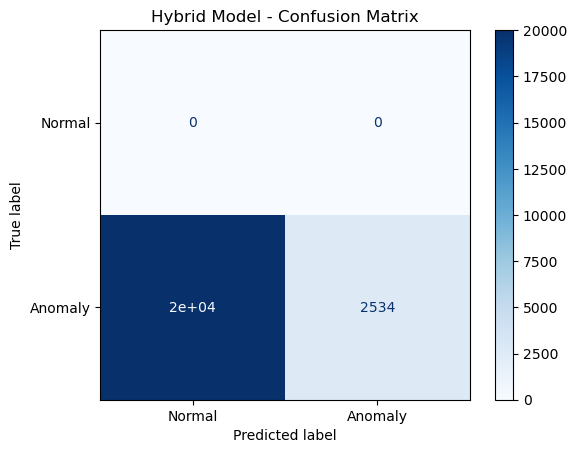

In [62]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_true = (test_df['label'] != 'normal').astype(int)

print("Hybrid Autoencoder + IF - Classification Report")
print(classification_report(y_true, y_pred_hybrid))

ConfusionMatrixDisplay.from_predictions(y_true, y_pred_hybrid, display_labels=["Normal", "Anomaly"], cmap="Blues")
plt.title("Hybrid Model - Confusion Matrix")
plt.show()


In [ ]:
### permutation_importance Random Forest ###

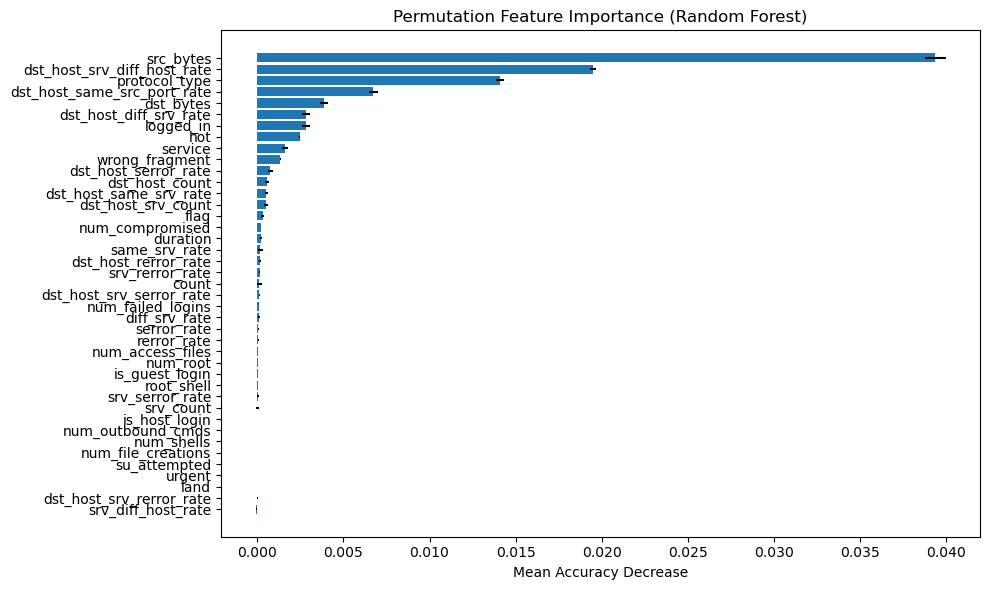

In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load your dataset
train_df = pd.read_csv("kdd_train.csv")

# Separate features and target
X = train_df.drop(columns=["labels"])
y = train_df["labels"]

# Encode categorical features
label_encoders = {}
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le

# Encode labels if they're also strings
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Permutation importance
result = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)

# Visualize
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance_Mean': result.importances_mean,
    'Importance_Std': result.importances_std
}).sort_values(by='Importance_Mean', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance_Mean'], xerr=importance_df['Importance_Std'])
plt.xlabel("Mean Accuracy Decrease")
plt.title("Permutation Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
### permutation_importance Logistic regression ###

In [122]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [124]:
lr_model = LogisticRegression(max_iter=2000)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


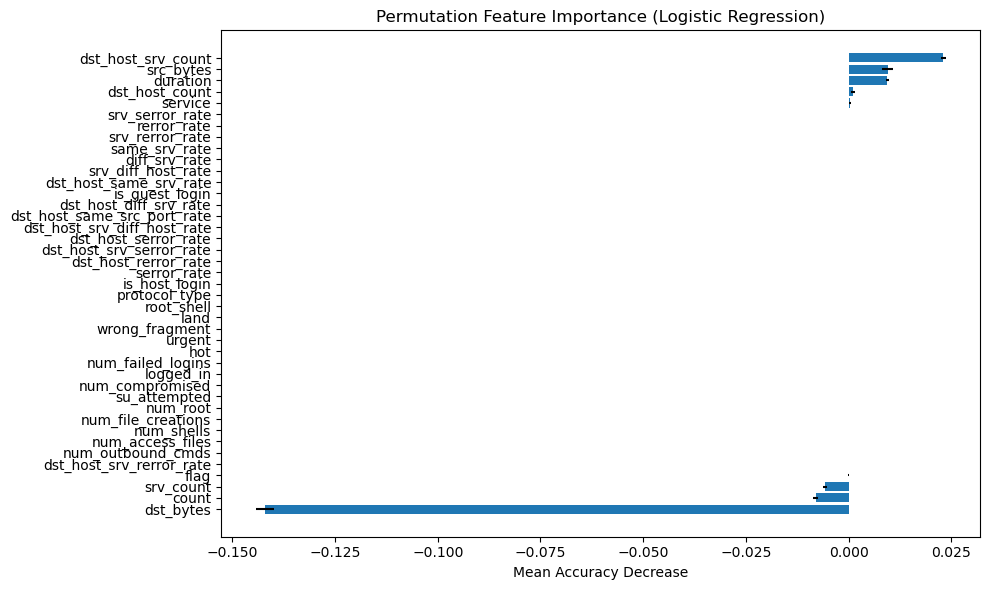

In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("kdd_train.csv")

# Separate features and label
X = df.drop(columns=["labels"])
y = df["labels"]

# Encode categorical columns
label_encoders = {}
for col in X.columns:
    if X[col].dtype == "object":
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le

# Encode label column if needed
if y.dtype == "object":
    y = LabelEncoder().fit_transform(y)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr_model.fit(X_train, y_train)

# Calculate permutation importance
perm_result = permutation_importance(lr_model, X_test, y_test, n_repeats=10, random_state=42)

# Create DataFrame of results
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance_Mean": perm_result.importances_mean,
    "Importance_Std": perm_result.importances_std
}).sort_values(by="Importance_Mean", ascending=False)

# Plot the permutation importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance_Mean"], xerr=importance_df["Importance_Std"])
plt.xlabel("Mean Accuracy Decrease")
plt.title("Permutation Feature Importance (Logistic Regression)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
### permutation_importance Isolation forest ###

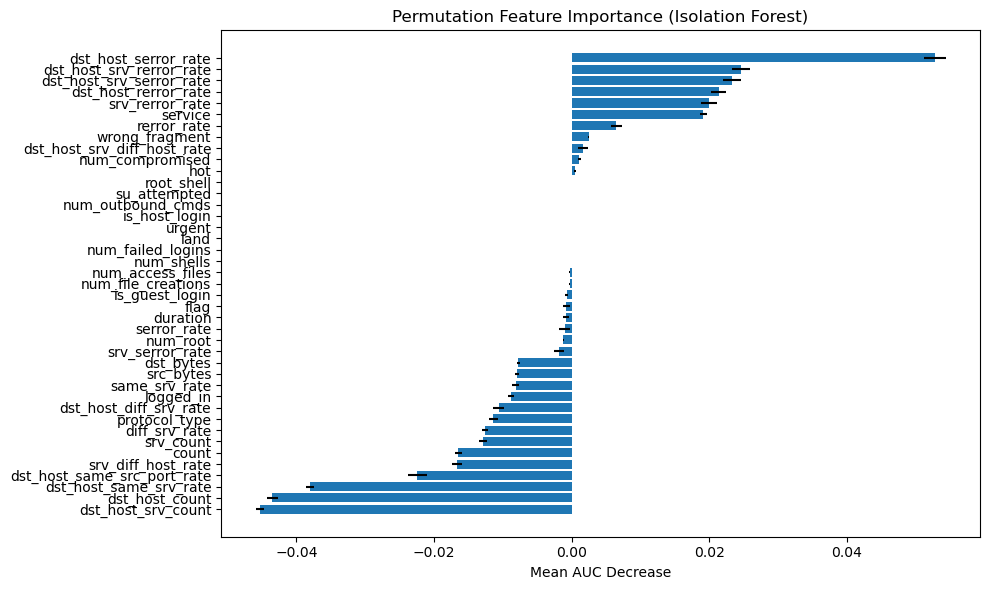

In [121]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, make_scorer

# Load dataset
df = pd.read_csv("kdd_train.csv")

# Separate features and label
X = df.drop(columns=["labels"])
y = df["labels"]

# Encode categorical features
label_encoders = {}
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le

# Binary encoding: normal (0), anomaly (1)
y_binary = np.where(y == 'normal', 0, 1)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Train Isolation Forest
iso = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
iso.fit(X_train)

# Define custom scoring function using AUC
def custom_scorer(estimator, X, y):
    scores = estimator.decision_function(X)  # higher = normal
    return roc_auc_score(y, -scores)  # flip score so higher = anomaly

# Permutation importance
result = permutation_importance(
    iso, X_test, y_test,
    n_repeats=10,
    random_state=42,
    scoring=custom_scorer
)

# Plot
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance_Mean": result.importances_mean,
    "Importance_Std": result.importances_std
}).sort_values(by="Importance_Mean", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance_Mean"], xerr=importance_df["Importance_Std"])
plt.xlabel("Mean AUC Decrease")
plt.title("Permutation Feature Importance (Isolation Forest)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



In [ ]:
### permutation_importance Autoencoder ###

Epoch 1/20
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 1s 284us/step - loss: 0.4484 - val_loss: 0.1058
Epoch 2/20
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 1s 272us/step - loss: 0.2128 - val_loss: 0.0700
Epoch 3/20
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 1s 322us/step - loss: 0.1946 - val_loss: 0.0487
Epoch 4/20
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 1s 289us/step - loss: 0.1603 - val_loss: 0.0531
Epoch 5/20
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 1s 272us/step - loss: 0.1078 - val_loss: 0.0451
Epoch 6/20
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 1s 272us/step - loss: 0.1123 - val_loss: 0.0348
Epoch 7/20
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 1s 271us/step - loss: 0.0837 - val_loss: 0.0433
Epoch 8/20
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 1s 271us/step - loss: 0.1199 - val_loss: 0.0342
Epoch 9/20
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 1s 271us/step - loss: 0.0606 - val_loss: 0.0570
Epoch 10/20
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 1s 272us/step - loss: 0.0933 - val_loss: 0.0875
Epoch 11/20
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 1s 272us/step - loss: 0.0687 - val_loss: 0.0324
Epoch 12

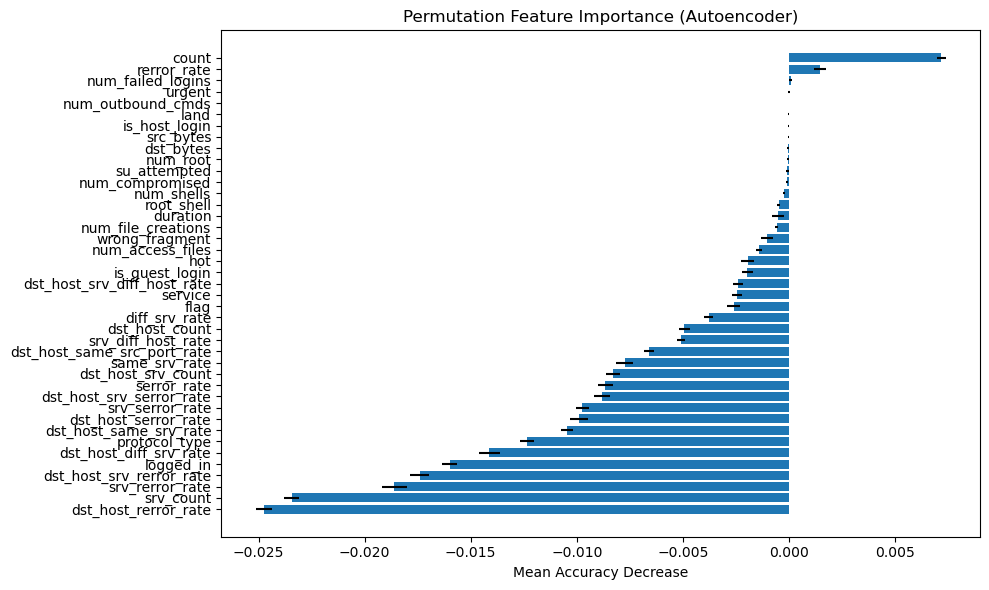

In [126]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Load dataset
df = pd.read_csv("kdd_train.csv")

# Separate features and target
X = df.drop(columns=["labels"])
y = df["labels"]

# Encode categorical features
label_encoders = {}
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split for training and validation
X_train, X_val = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Build autoencoder
input_dim = X_train.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(32, activation='relu')(input_layer)
encoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=20, batch_size=32, validation_data=(X_val, X_val), verbose=1)

# Compute reconstruction error
X_reconstructed = autoencoder.predict(X_scaled)
reconstruction_error = np.mean((X_scaled - X_reconstructed)**2, axis=1)

# Create binary target (0 for normal, 1 for anomaly)
y_binary = np.where(y == 'normal', 0, 1)

# Define a scorer that uses reconstruction error for anomaly classification
def custom_score(estimator, X, y):
    recon = estimator.predict(X)
    error = np.mean((X - recon)**2, axis=1)
    predictions = (error > np.percentile(error, 95)).astype(int)
    return np.mean(predictions == y)

# Permutation Importance
perm_result = permutation_importance(autoencoder, X_scaled, y_binary, scoring=custom_score, n_repeats=10, random_state=42)

# Visualize importance
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance_Mean": perm_result.importances_mean,
    "Importance_Std": perm_result.importances_std
}).sort_values(by="Importance_Mean", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance_Mean"], xerr=importance_df["Importance_Std"])
plt.xlabel("Mean Accuracy Decrease")
plt.title("Permutation Feature Importance (Autoencoder)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
